In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import joblib
import numpy as np


Импортируем необходимые библиотеки<br>
Импортируем данные<br>
Проводим предобработку данных<br>


In [2]:
df = pd.read_csv('Walmart.csv')
df.head().T

,0,1,2,3,4
Store,1,1,1,1,1
Date,05-02-2010,12-02-2010,19-02-2010,26-02-2010,05-03-2010
Weekly_Sales,1643690.9,1641957.44,1611968.17,1409727.59,1554806.68
Holiday_Flag,0,1,0,0,0
Temperature,42.31,38.51,39.93,46.63,46.5
Fuel_Price,2.572,2.548,2.514,2.561,2.625
CPI,211.096358,211.24217,211.289143,211.319643,211.350143
Unemployment,8.106,8.106,8.106,8.106,8.106


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Преобразуем дату в формат datetime<br>
Определим номер недели в году<br>
Удалим колонку дата<br>

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df['Week'] = df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').strftime('%V'))
df.drop(['Date'],axis=1,inplace=True)

C:\Users\77017\AppData\Local\Temp\ipykernel_15248\3222129889.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


Переведем колонку Week в числовое значение

In [6]:
df['Week'] = df['Week'].astype('int64')

Проверяем данные на выбросы и распределение

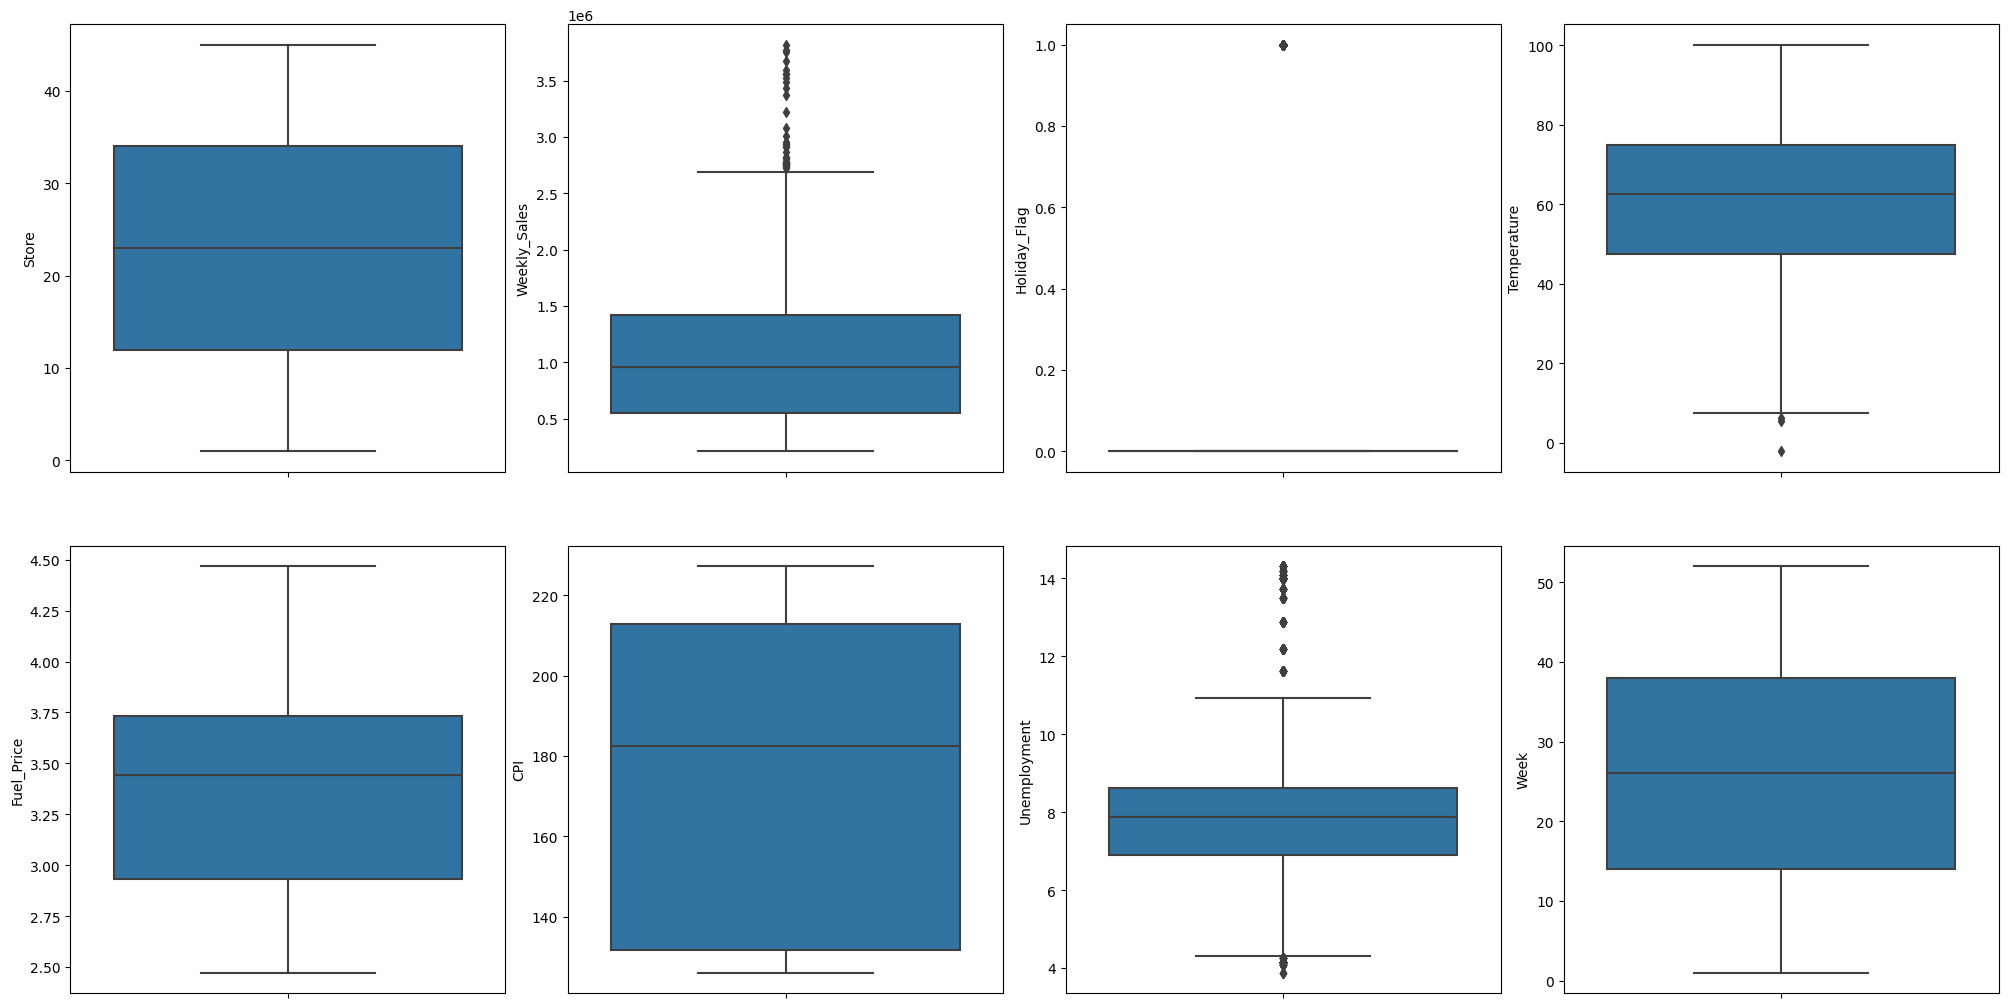

In [7]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize = (20,10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index+=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

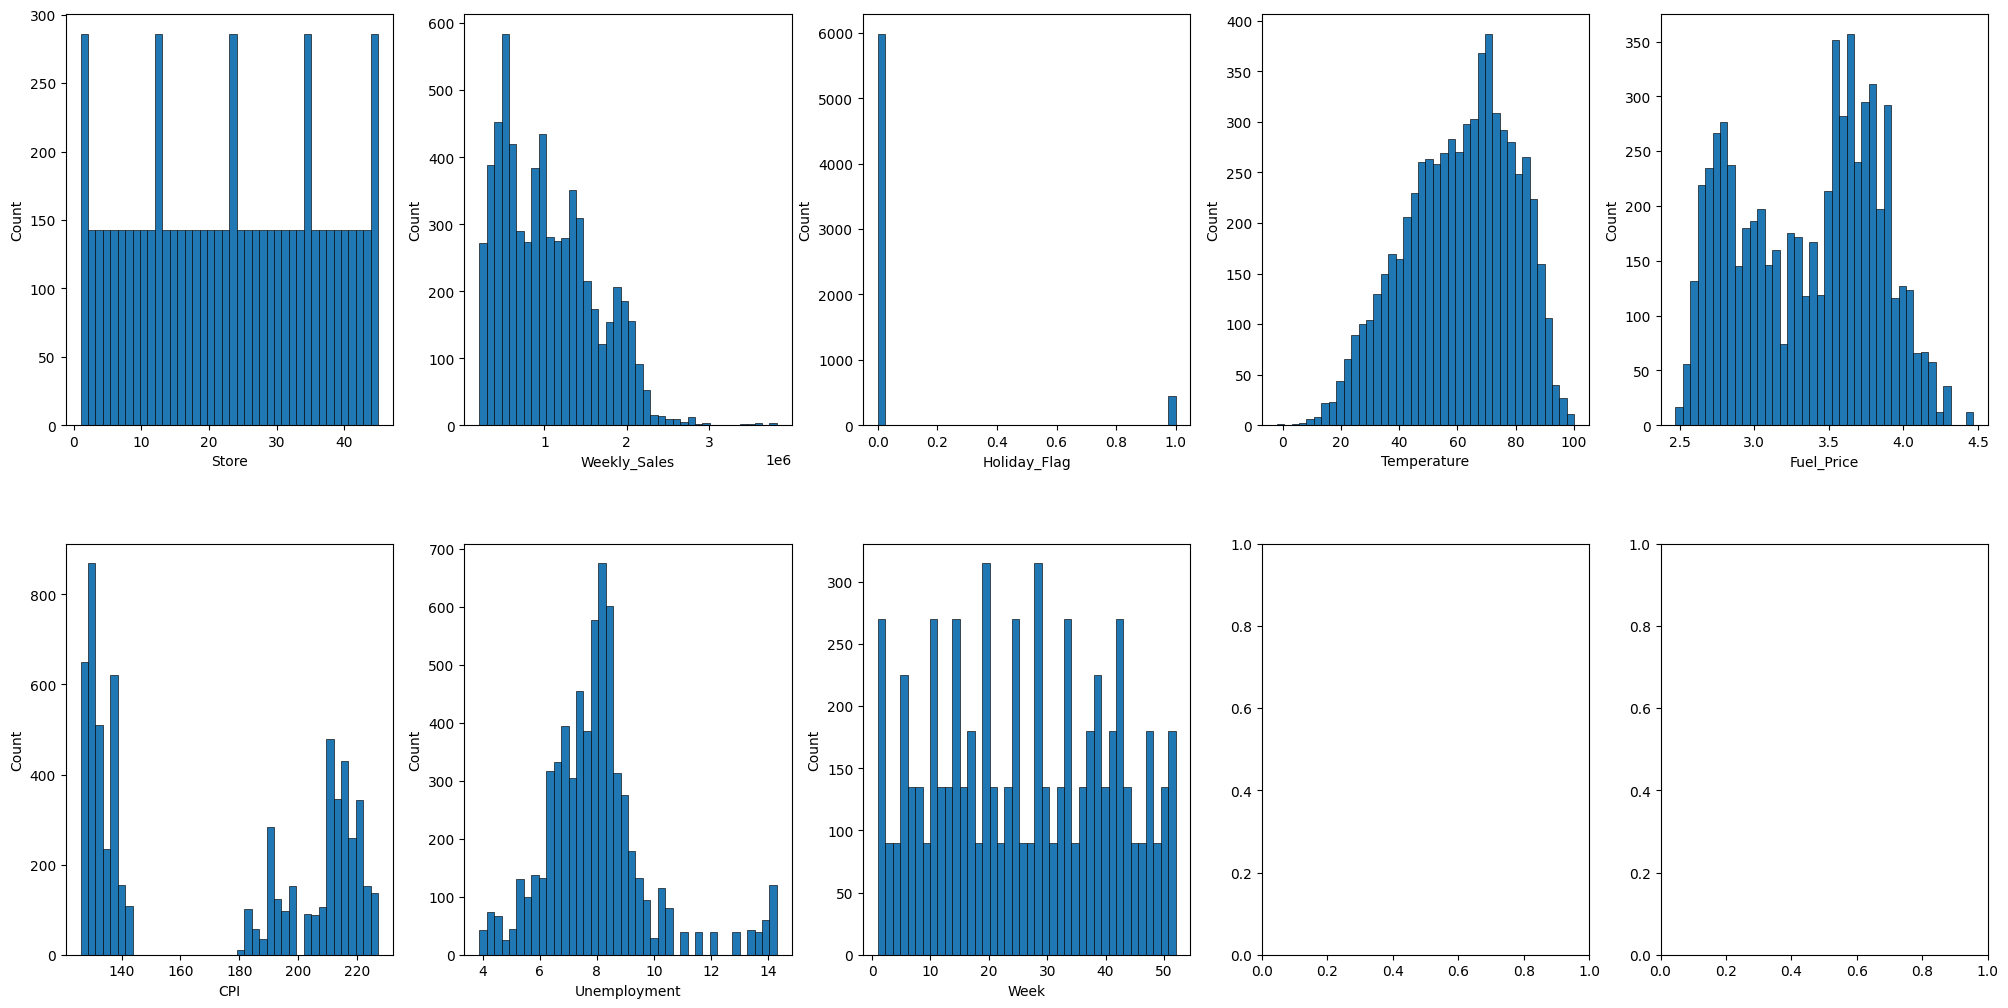

In [8]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize = (20,10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.histplot(df[k], bins=40, alpha=1, ax=axs[index])
    index+=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Выводы:<br>
Есть аномальные значения/выбросы в колонках 'Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Week          6435 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 402.3 KB


In [10]:
def plot_corr_matrix(df):
    """
    Функция построения матрицы корреляции
    """
    plt.figure(figsize=(10, 5))
    sns.heatmap(df.corr().abs(), vmin=0, vmax=1, annot=True, fmt=".2f", linewidths=0.1, cmap="YlGnBu")
    plt.show()

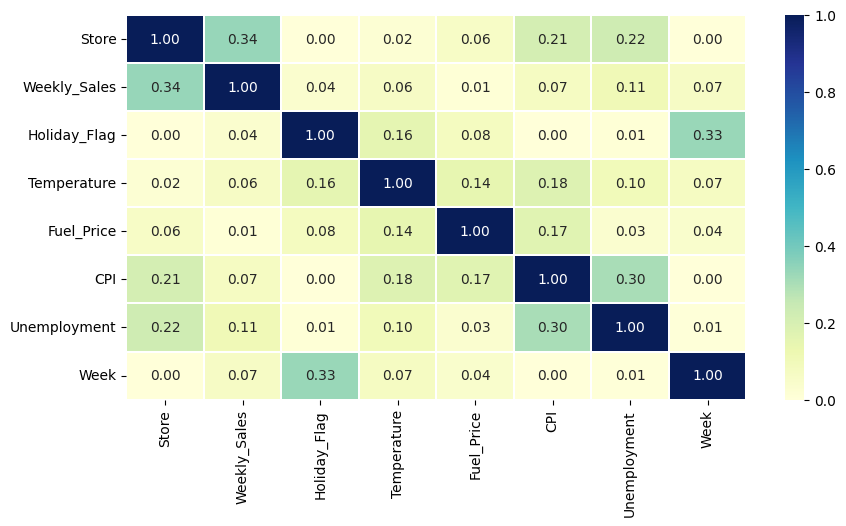

In [11]:
plot_corr_matrix(df);

Удаляем выбросы/Ouliers

In [12]:
num_features = ['Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']
for feature in num_features:
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df = df[(df[feature] >= lower) & (df[feature] <= upper)]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5923 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5923 non-null   int64  
 1   Weekly_Sales  5923 non-null   float64
 2   Holiday_Flag  5923 non-null   int64  
 3   Temperature   5923 non-null   float64
 4   Fuel_Price    5923 non-null   float64
 5   CPI           5923 non-null   float64
 6   Unemployment  5923 non-null   float64
 7   Week          5923 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 416.5 KB


Обучение модели<br>
Импорт необходимых библиотек<br>

In [14]:
from sklearn.model_selection import train_test_split , GridSearchCV 
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from category_encoders import BinaryEncoder

Создаем функцию для улучшения и определения переобучения с помощью GridSearchCV<br>

In [15]:
def model_tunning(model,X_train,y_train,param_grid):
    '''Функция принимает модель и улучшает ее с помощью GridSearch, затем печатает лучшие параметры и возвращает лучший оценщик'''
    
    grid_search = GridSearchCV(estimator= model,param_grid= param_grid,cv=5,scoring='r2')
    grid_search.fit(X_train,y_train)
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_
    best_score = grid_search.best_score_
    print("Best parameters are: ",best_params)
    print('Mean cross-validated score of the best_estimator is: ',best_score)
    return best_estimator

In [46]:
df['Store'] = df['Store'].astype('object')
df['Week'] = df['Week'].astype('object')
df['Holiday_Flag'] = df['Holiday_Flag'].astype('object')

Выделяем целевую колонку

In [48]:
features = df.columns.drop(['Weekly_Sales'])
target = 'Weekly_Sales'

X = df[features]
y = df[target]

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5923 entries, 0 to 6434
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5923 non-null   object 
 1   Holiday_Flag  5923 non-null   object 
 2   Temperature   5923 non-null   float64
 3   Fuel_Price    5923 non-null   float64
 4   CPI           5923 non-null   float64
 5   Unemployment  5923 non-null   float64
 6   Week          5923 non-null   object 
dtypes: float64(4), object(3)
memory usage: 370.2+ KB


Делим данные на тренировочные и тестовые в процентном соотношении 80/20, т.к. данных немного

In [50]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42 ,  test_size=0.2)

Трансформируем данные с помощью логарифмирования<br>
Преобразуем колонки 'Store' и 'Week' и 'Holiday_Flag' в категориальные для использования BinaryEncoder<br>

In [52]:
y_train_orig = y_train
y_test_orig = y_test

y_train = np.log1p(y_train)
y_test = np.log1p(y_test)


Тренировка модели

In [53]:
preprocessor = make_pipeline(
        BinaryEncoder(cols=['Store','Week','Holiday_Flag']),
        StandardScaler()
)

In [54]:
lin_reg = make_pipeline(
        preprocessor,
        PolynomialFeatures(degree=2),
        LinearRegression()
)
param_grid = {'polynomialfeatures__degree':[2,3,4,5]}
lin_reg = model_tunning(lin_reg,X_train,y_train,param_grid)

Best parameters are:  {'polynomialfeatures__degree': 3}
Mean cross-validated score of the best_estimator is:  0.9776020173713563


Оценка модели на train и test

In [56]:
lin_reg.fit(X_train,y_train)
print("Training set Accuracy:",round(lin_reg.score(X_train,y_train),3)*100)
print("Test set Accuracy:",round(lin_reg.score(X_test,y_test),3)*100)

Training set Accuracy: 98.7
Test set Accuracy: 97.8


In [57]:
y_pred_test = lin_reg.predict(X_test)
y_pred_train = lin_reg.predict(X_train)

In [58]:
y_pred_test

array([13.80790234, 14.45000744, 13.16851234, ..., 13.32978153,
       14.27184582, 13.93853188])

In [59]:
y_pred_train

array([12.77547646, 14.46856117, 13.30616093, ..., 13.97892189,
       13.22403812, 13.25289345])

In [60]:
print("MAE: ", (mean_absolute_error(y_pred_test, y_test)))
print("MSE: ", (mean_squared_error(y_pred_test, y_test)))
print("R2 score: ", (r2_score(y_pred_test, y_test)))

MAE:  0.0622412488944362
MSE:  0.007490171388012818
R2 score:  0.9778771123890371


In [61]:
print("MAE: ", (mean_absolute_error(y_pred_train, y_train)))
print("MSE: ", (mean_squared_error(y_pred_train, y_train)))
print("R2 score: ", (r2_score(y_pred_train, y_train)))

MAE:  0.050109863533771774
MSE:  0.004519554886786325
R2 score:  0.986674006602063


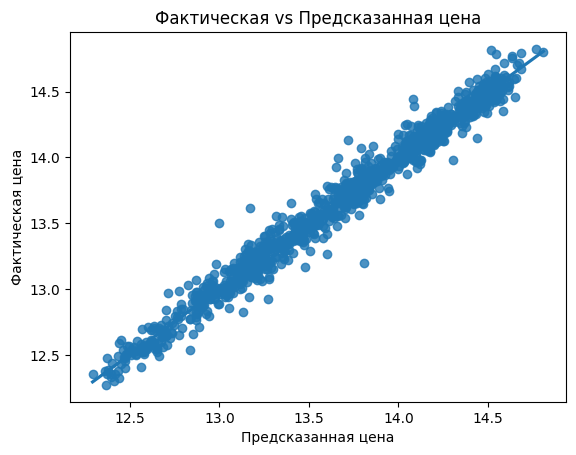

In [62]:
sns.regplot(x=y_pred_test, y=y_test)
plt.xlabel("Предсказанная цена")
plt.ylabel('Фактическая цена')
plt.title("Фактическая vs Предсказанная цена")
plt.show()

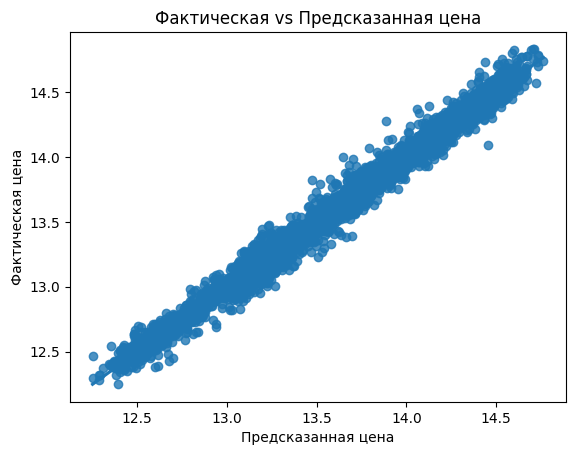

In [63]:
sns.regplot(x=y_pred_train, y=y_train)
plt.xlabel("Предсказанная цена")
plt.ylabel('Фактическая цена')
plt.title("Фактическая vs Предсказанная цена")
plt.show()

In [64]:
path = 'final_model2.sav'
joblib.dump(lin_reg, open(path, 'wb'))

In [65]:
lin_reg

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('binaryencoder',
                                  BinaryEncoder(cols=['Store', 'Week',
                                                      'Holiday_Flag'],
                                                mapping=[{'col': 'Store',
                                                          'mapping':      Store_0  Store_1  Store_2  Store_3  Store_4  Store_5
 1         0        0        0        0        0        1
 2         0        0        0        0        1        0
 3         0        0        0        0        1        1
 4         0        0        0        1        0        0
 5         0        0        0        1        0        1
 6         0        0        0        1        1        0
 7         0        0        0        1        1        1
 8         0        0        1        0        0        0
 9         0        0        1        0        0        1
 10        0        0        1        0        1        0
 11        0        0        1        0        1        1
 12        0        0        1        1        0        0
 13        0        0        1        1        0        1
 14        0        0        1        1        1        0
 15        0        0        1        1        1        1
 16        0        1        0        0        0        0
 17        0        1        0        0        0        1
 18        0        1        0        0        1        0
 19        0        1        0        0        1        1
 20        0        1        0        1        0        0
 21        0        1        0        1        0        1
 22        0...
 37       1       0       0       1       0       1
 38       1       0       0       1       1       0
 39       1       0       0       1       1       1
 40       1       0       1       0       0       0
 41       1       0       1       0       0       1
 42       1       0       1       0       1       0
 43       1       0       1       0       1       1
 44       1       0       1       1       0       0
 45       1       0       1       1       0       1
 46       1       0       1       1       1       0
 47       1       0       1       1       1       1
 48       1       1       0       0       0       0
 49       1       1       0       0       0       1
 50       1       1       0       0       1       0
 51       1       1       0       0       1       1
 52       1       1       0       1       0       0
-1        0       0       0       0       0       0
-2        0       0       0       0       0       0},
                                                         {'col': 'Holiday_Flag',
                                                          'mapping':     Holiday_Flag_0  Holiday_Flag_1
 1               0               1
 2               1               0
-1               0               0
-2               0               0}])),
                                 ('standardscaler', StandardScaler())])),
                ('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [66]:
test_df = pd.read_csv('Walmart.csv')
test_df = test_df.iloc[:200]
test_df.to_csv('test_model.csv')

In [67]:
test_df.drop(['Weekly_Sales'],axis=1,inplace=True)

In [68]:
test_df.head()

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,0,46.50,2.625,211.350143,8.106


In [69]:
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df['Date'] = test_df['Date'].dt.strftime('%Y-%m-%d')
test_df['Week'] = test_df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').strftime('%V'))
test_df.drop(['Date'],axis=1,inplace=True)

C:\Users\77017\AppData\Local\Temp\ipykernel_15248\30990082.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  test_df['Date'] = pd.to_datetime(test_df['Date'])


In [70]:
test_df.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week
0,1,0,42.31,2.572,211.096358,8.106,17
1,1,1,38.51,2.548,211.242170,8.106,48
2,1,0,39.93,2.514,211.289143,8.106,07
3,1,0,46.63,2.561,211.319643,8.106,08
4,1,0,46.50,2.625,211.350143,8.106,18


In [71]:
pred = lin_reg.predict(test_df)

In [72]:
pred

array([ 1.42838011e+01, -3.32799802e+10,  1.42711287e+01,  1.42535143e+01,
        1.42873220e+01,  1.42553053e+01,  1.42876425e+01,  1.43043013e+01,
        1.42051344e+01,  1.42182150e+01,  1.42303381e+01,  1.42268553e+01,
        1.42183104e+01,  1.42364721e+01,  1.42442656e+01,  1.42398939e+01,
        1.42294645e+01,  1.42138777e+01,  1.42016554e+01,  1.42046461e+01,
        1.42108030e+01,  1.41983633e+01,  1.41857595e+01,  1.41891851e+01,
        1.41852522e+01,  1.41919394e+01,  1.42134733e+01,  1.42352972e+01,
        1.42239637e+01,  1.42005949e+01,  1.41655607e+01, -3.32799802e+10,
        1.41713095e+01,  1.41838217e+01,  1.41634283e+01,  1.41793127e+01,
        1.42142248e+01,  1.42153692e+01,  1.42122641e+01,  1.42185068e+01,
        1.42334871e+01,  1.42818327e+01, -3.32799802e+10,  1.42621145e+01,
        1.43316717e+01,  1.43203459e+01,  1.43136396e+01, -3.32799802e+10,
        1.43461637e+01,  1.44344053e+01,  1.43876677e+01,  1.43930082e+01,
        1.44033689e+01, -